# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Зерна генераторов псевдо-случайных чисел ('сиды') фиксируются для того, чтобы \n"
      "обеспечить воспроизводимость результатов выполнения кода от запуска к запуску")

Зерна генераторов псевдо-случайных чисел ('сиды') фиксируются для того, чтобы 
обеспечить воспроизводимость результатов выполнения кода от запуска к запуску


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
pd.concat([df_test.head(5), df_test.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

В тренировочном датасете пропуски присутствуют в колонках **mileage**, **engine**, **max_power**, **torque** и **seats**

In [9]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

В тестовом датасете пропуски присутствуют в тех же колонках: **mileage**, **engine**, **max_power**, **torque** и **seats**

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
duplicate_flags = df_train.drop('selling_price', axis=1).duplicated()
duplicate_count = duplicate_flags.sum()
print("Количество объектов с одинаковым признаковым описанием в тренировочном датасете: ", duplicate_count)

Количество объектов с одинаковым признаковым описанием в тренировочном датасете:  1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [11]:
duplicates = df_train[duplicate_flags]
duplicates

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [12]:
"""
так как метод duplicated(), использованный выше для определения дубликатов в признаковом описании, помечает 
дубликатами все строки-дубликаты, кроме первой, то при удалении таких строк как раз и реализуется требование из условия:
 --"Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю" 
"""

#ВНИМАНИЕ! При повторном выполнении следующей строки возникает исключение, т.к. строки уже были удалены из датасета
df_train.drop(duplicates.index, inplace=True)

In [13]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [14]:
df_train.reset_index(drop=True, inplace=True)

#выведем последние 5 записей, чтобы убедиться, что последние значения индекса 
# соответствуют количеству строк в датасете, а не превышают их
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
5839,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

In [15]:
"""
Объединим все названия единиц измерения, которые встречаются в столбцах mileage, engine и max_power, в кортеж, 
очистим от них значения в столбцах, воспользовавшись методом replace, после чего преобразуем полученные значения
к численному формату (в нашем случае pd.to_numeric возвращает столбцы типа float64) 
"""

unit_names = ['bhp', 'kmpl', 'km/kg', 'CC']
col_names = ['mileage', 'engine', 'max_power']
dataframes = [df_train, df_test]

for df in dataframes:
    for col_name in col_names: 
        df[col_name] = pd.to_numeric(df[col_name].replace("|".join(unit_names), '', regex=True).str.strip())


In [16]:
df_train.drop(['torque'], axis=1, inplace=True)
df_test.drop(['torque'], axis=1, inplace=True)

**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [17]:
"""
Для заполнения пропусков медианами из тренировочного датасета воспользуемся SimpleImputer из sklearn.
Зададим ему соответствующую strategy, обучим на тренировочном датасете, после чего заменим пропуски 
в трейне и тесте. 
"""
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

col_names = ['mileage', 'engine', 'max_power', 'seats']
dataframes = [df_train, df_test]

imputer.fit(df_train[col_names])

for df in dataframes: 
    df[col_names] = imputer.transform(df[col_names])


"""И убедимся, что все пропуски заполнены"""
for df in dataframes: 
    display(df[col_names].isna().sum())

mileage      0
engine       0
max_power    0
seats        0
dtype: int64

mileage      0
engine       0
max_power    0
seats        0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [19]:
col_names = ['engine', 'seats']
for df in dataframes:
    for col_name in col_names:
        df[col_name] = df[col_name].astype('int64')

Признак seats, возможно, лучше сделать категориальным, т.к. его связь с таргетом не является линейной. 
Для демонстрации изобразим соответствующую диаграмму рассеяния. По ней мы видим, что, например, для наиболее 
популярных значений seats (5 и 7) диапазон цен шире, а средняя цена автомобилей выше, чем для значения seats, равного 6. 
Другими словами, нельзя сказать, что таргет растет с увеличением seats, или, наоборот уменьшается.


<Axes: xlabel='seats', ylabel='selling_price'>

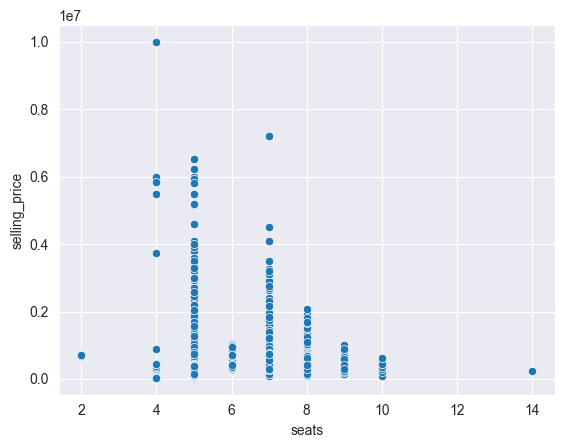

In [18]:
print("Признак seats, возможно, лучше сделать категориальным, т.к. его связь с таргетом не является линейной. \n"
      "Для демонстрации изобразим соответствующую диаграмму рассеяния. По ней мы видим, что, например, для наиболее \n"
      "популярных значений seats (5 и 7) диапазон цен шире, а средняя цена автомобилей выше, чем для значения seats, равного 6. \n"
      "Другими словами, нельзя сказать, что таргет растет с увеличением seats, или, наоборот уменьшается.")

sns.scatterplot(x=df_train['seats'], y=df_train['selling_price'])

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

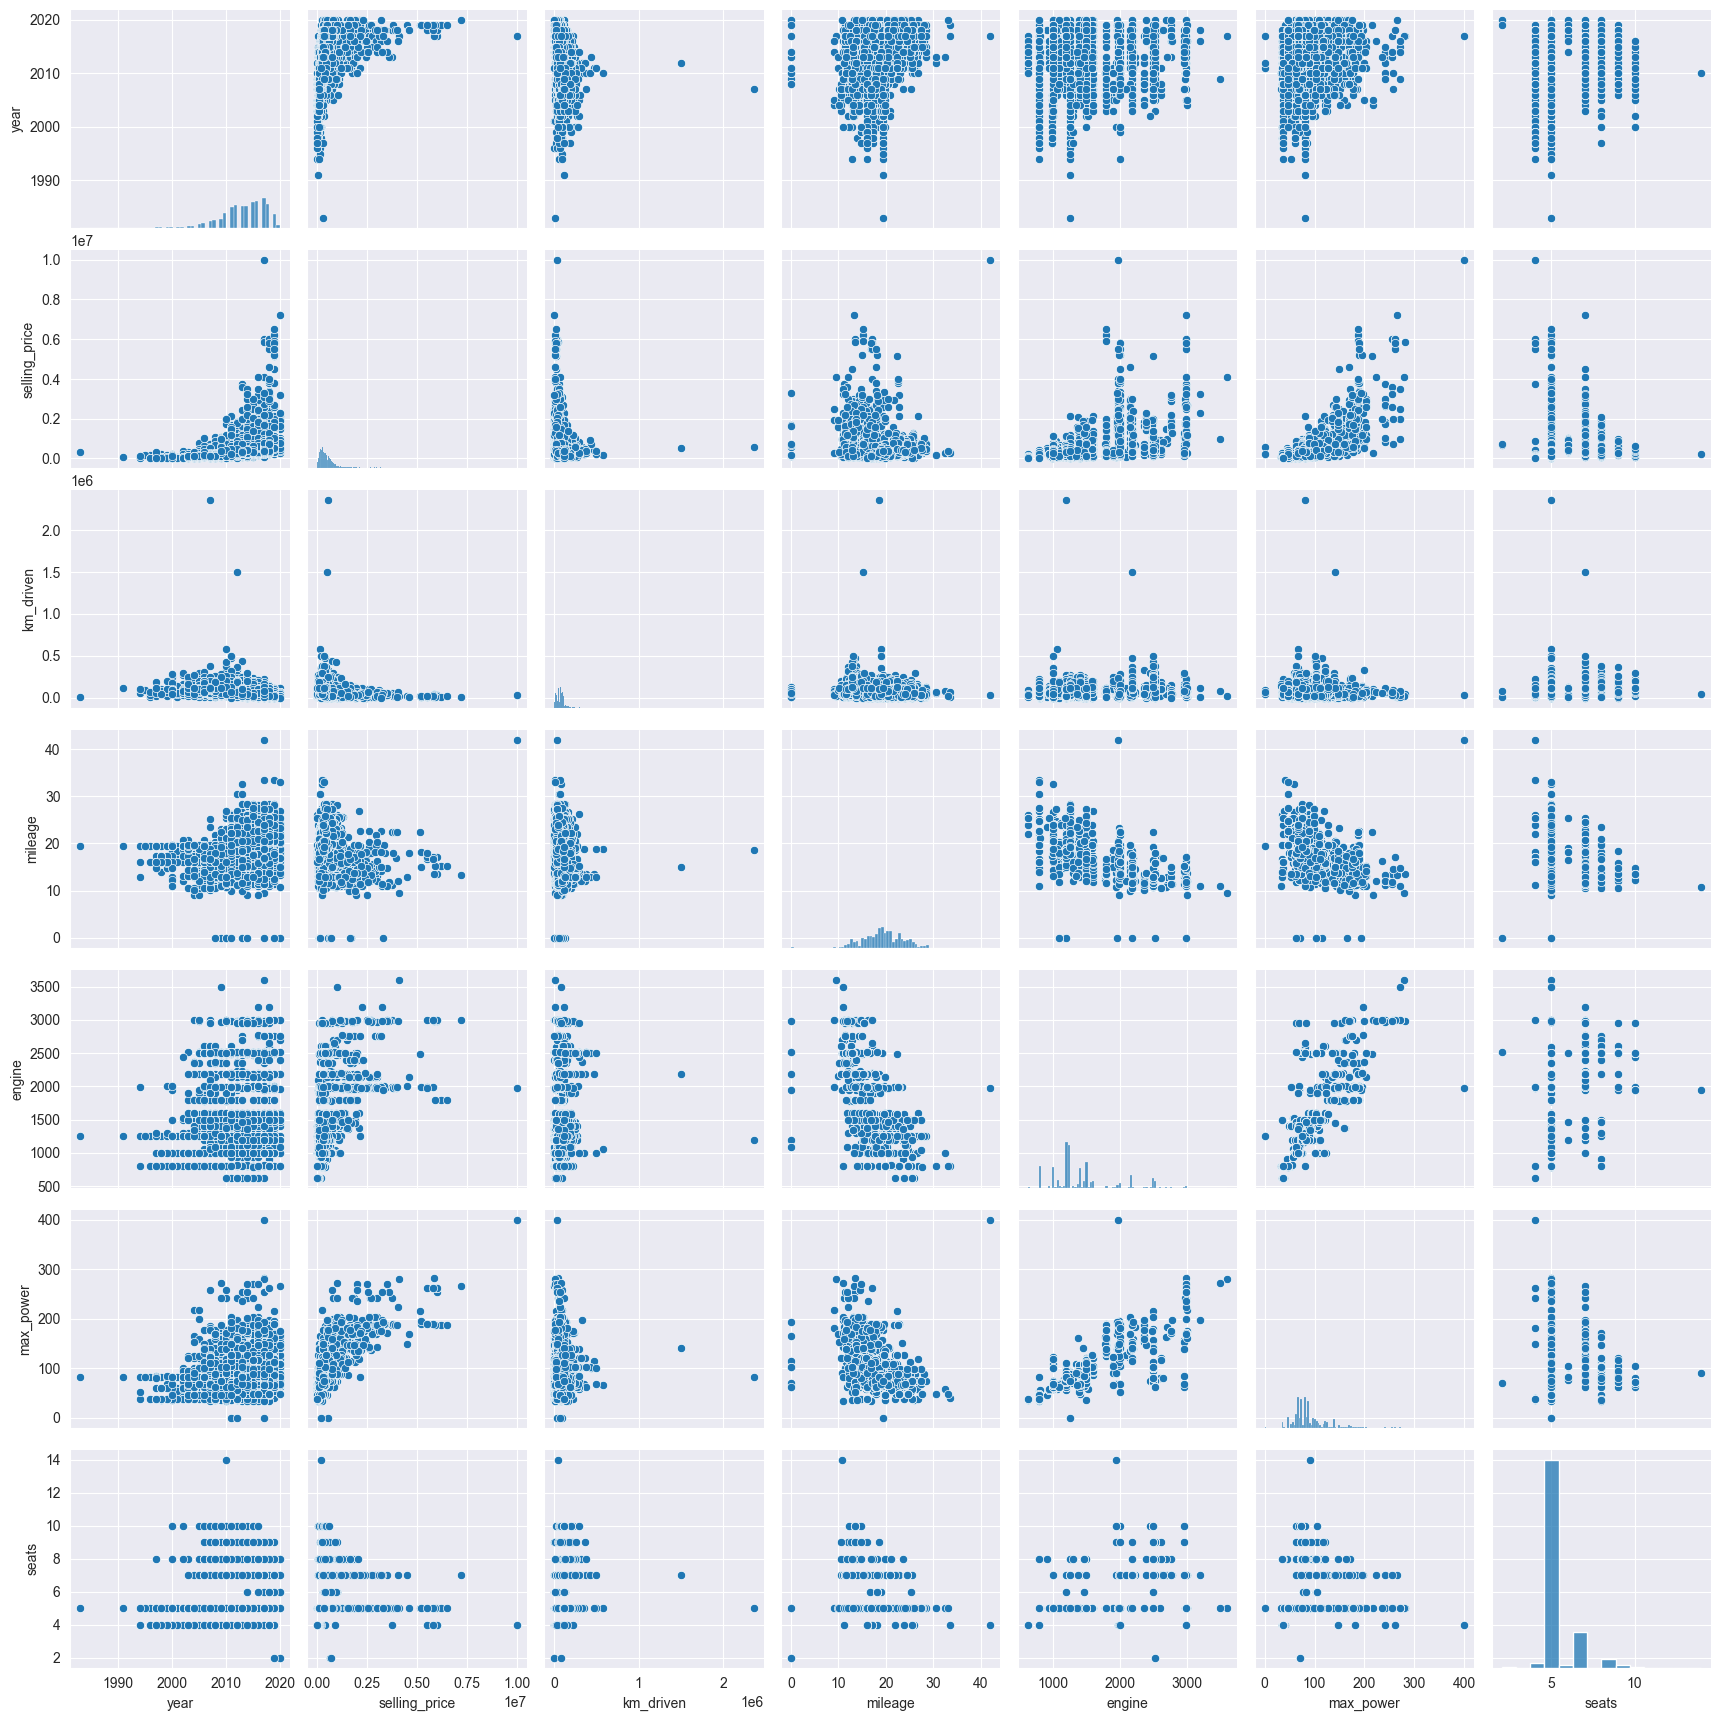

In [20]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

О связи предикторов с целевой переменной по графику попарных распределений можно сказать следующее: 
- чем выше значение **года выпуска** автомобиля (year), тем в среднем выше его цена, что логично, т.к. чем старше автомобиль, тем меньше он стоит по сравнению с новым. При этом, среди автомобилей любого года выпуска есть как дешевые модели, так и дорогие. И цена их в рамках одного и того же года тоже будет меньше или больше. С этим и связана форма графика, где минимум цены остается примерно одинаковым с уменьшением года, а максимум - снижается;
- чем больше **пробег** (km_driven), тем меньше в среднем его цена. Но аналогично году выпуска, для каждого значения пробега можно найти как дорогие марки машин, так и дешевые, поэтому минимум цены почти не меняется в зависимости от пробега, а максимум - снижается;
- значения **mileage** (расстояние, которое автомобиль может проехать на одном литре/килограмме топлива) влияет довольно слабо. В диапазоне значений mileage от 10 до 30, где сосредоточено большинство автомобилей выборки, можно заметить небольшое снижение средней цены, что может быть связано с тем, что экономные автомобили (имеющие большее значение mileage) обычно более дешевые, т.к. экономичность должна проявляться и в стоимости самого автомобиля;
- чем больше значения **объема двигателя** (engine) и его **мощности** (max_power), тем в среднем выше цена, что вполне объяснимо, т.к. мощные автомобили с большим объемом двигателя обычно дороже.
- **количество мест** в автомобиле (seats) влияет на цену, но влияет нелинейно. Так для наиболее популярных значений seats (5 и 7 мест) диапазон цены достаточно широкий, в то время, как для значения 6 максимальное и средние значения цены существенно ниже. Как отмечалось выше, возможно, лучше рассматривать seats как категориальный признак.   

О корреляциях признаков по графику можно сказать, что:
- можно увидеть заметную *положительную корреляцию между объемом и мощностью двигателя*, что логично, т.к. больший объем двигателя в среднем соответствует большей его мощности; 
- можно заметить *небольшую отрицательную корреляцию между мощностью двигателя (и, соответственно, его объемом) и mileage*, что тоже объяснимо, т.к. мощные двигатели бывают менее экономичными (хотя, например, турбированные бензиновые двигатели при небольшом объеме могут иметь большую мощность и быть сравнительно экономичными).

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

In [21]:
"""Для более удобного сравнения отобразим на pairplot данные теста и трейна, но разными цветами"""
df_train_flagged = df_train.copy()
df_train_flagged['dataset'] = 'train'
df_test_flagged = df_test.copy()
df_test_flagged['dataset'] = 'test'

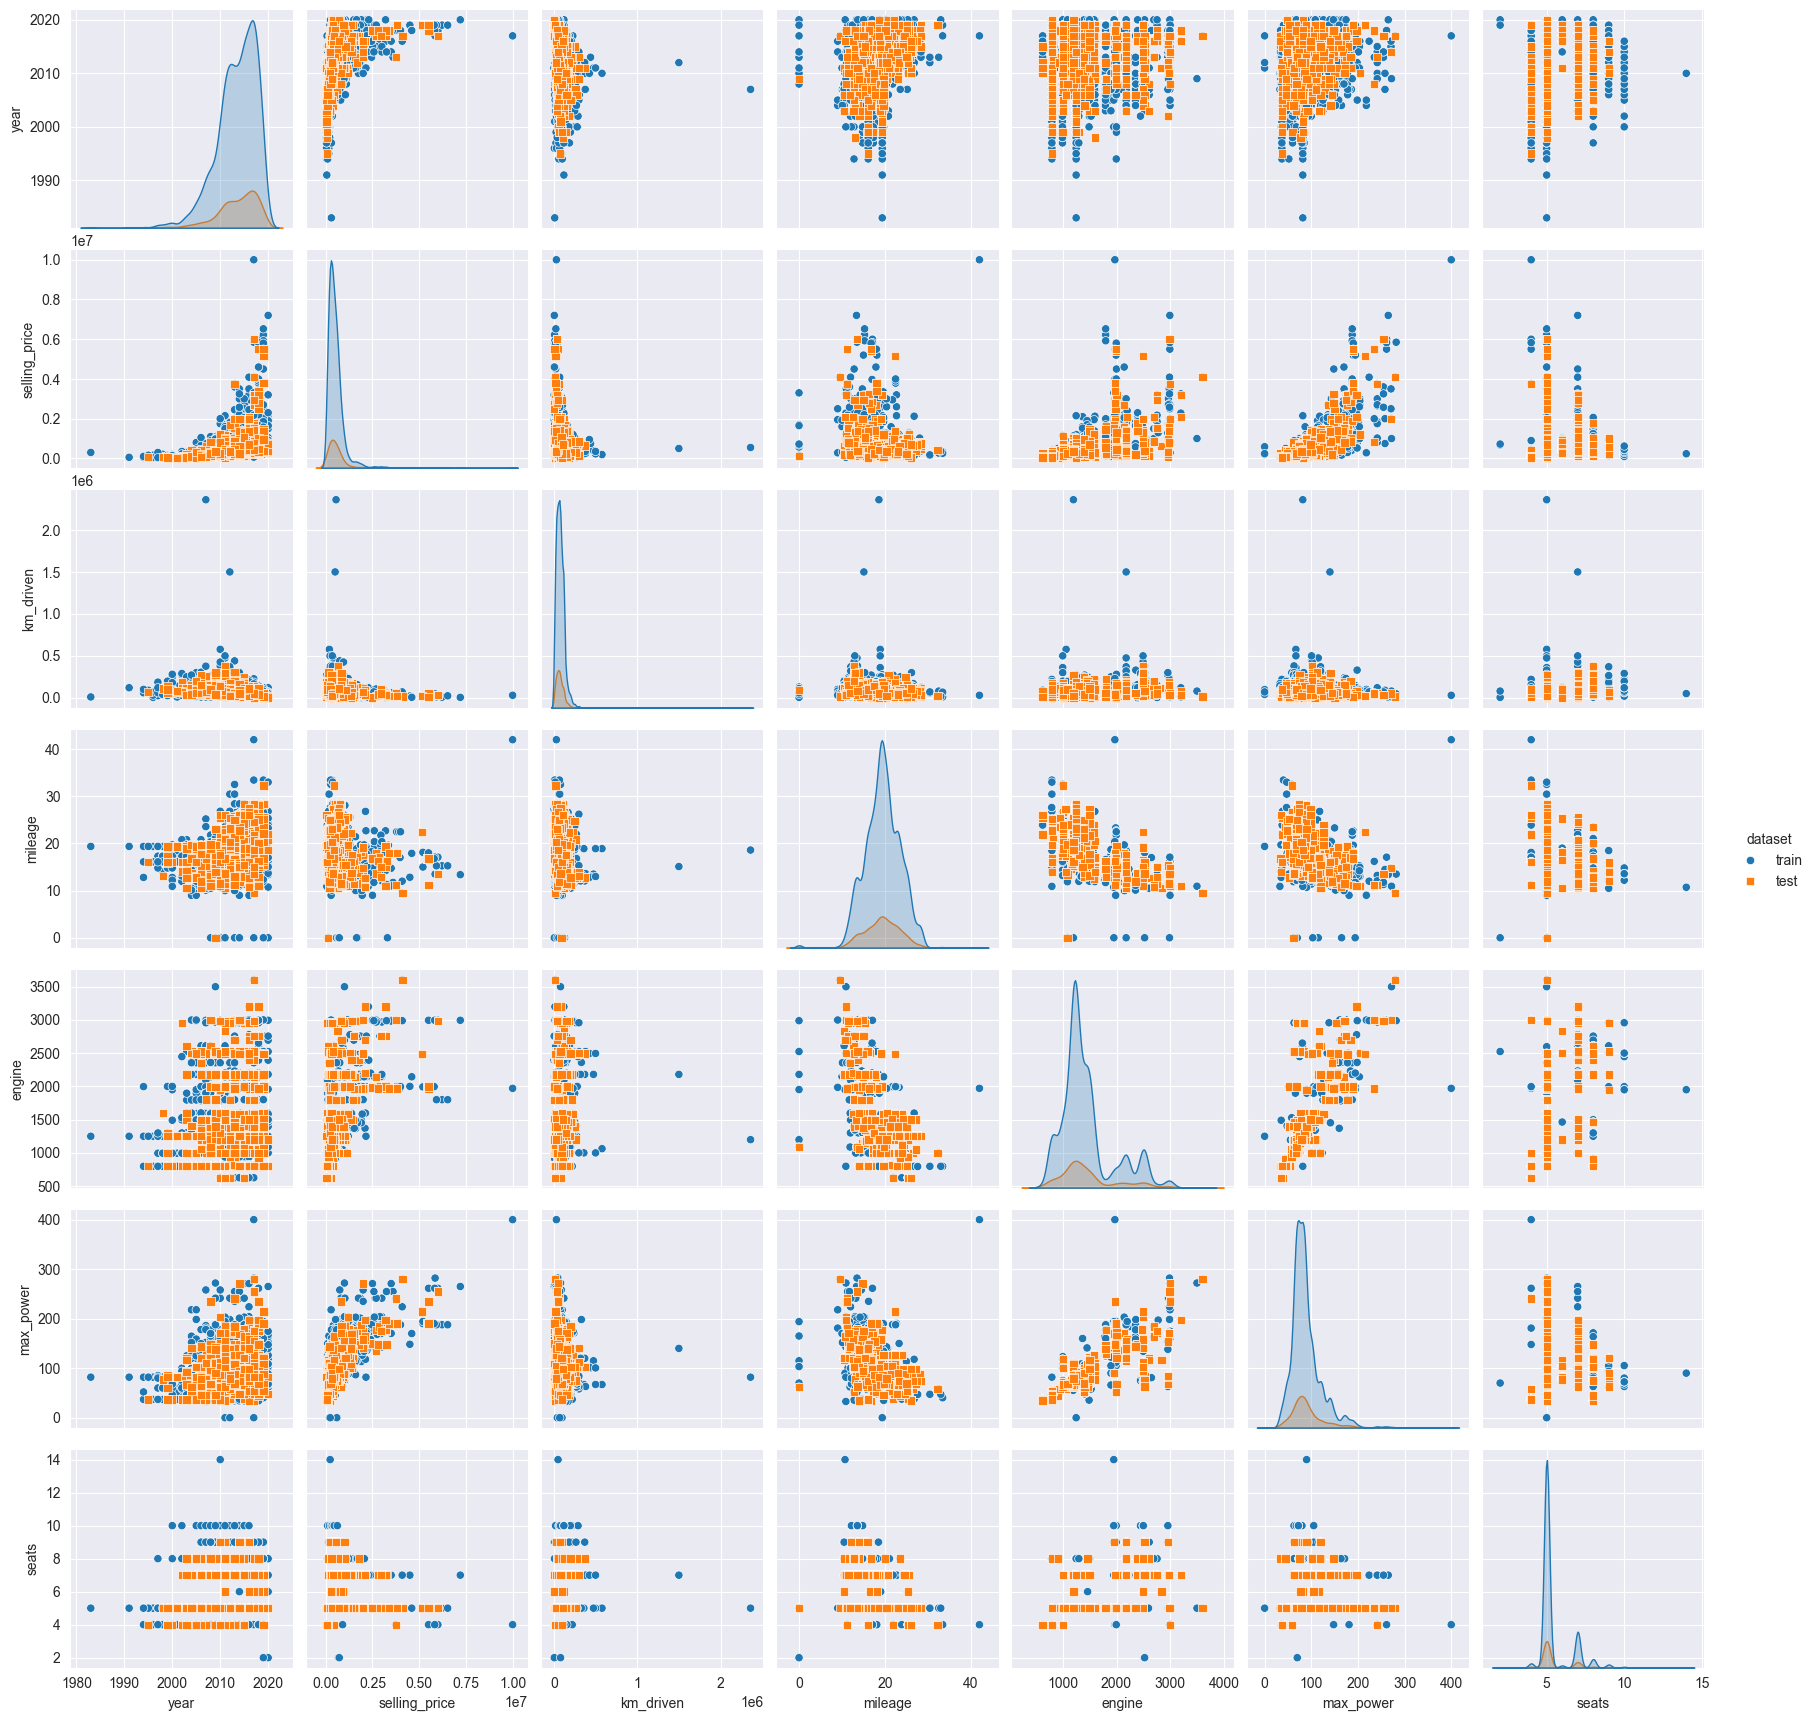

In [22]:
sns.pairplot(pd.concat([df_train_flagged, df_test_flagged]), hue='dataset', markers=["o", "s"])

К сожалению, на попарных графиках рассеяния точки тестового датасета (оранжевые) закрывают собой точки тренировочного датасета (попытки подорать прозрачность alpha не привели к хорошему визуальному результату), но глядя на получившийся график и график, потроенный ранее только для трейна, можно увидеть, что в целом **совокупности при разделении на трейн и тест оказались похожими**. Точки тестового датасета покрывают на графиках примерно те же области, что и точки трейна. Характер кривых распределения признаков на диагонали pairplot тоже схож, можно наблюдать примерно те же максимумы, но с меньшими значения по оси y, что логично, т.к. количество строк в тесте меньше, чем в трейне.   

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

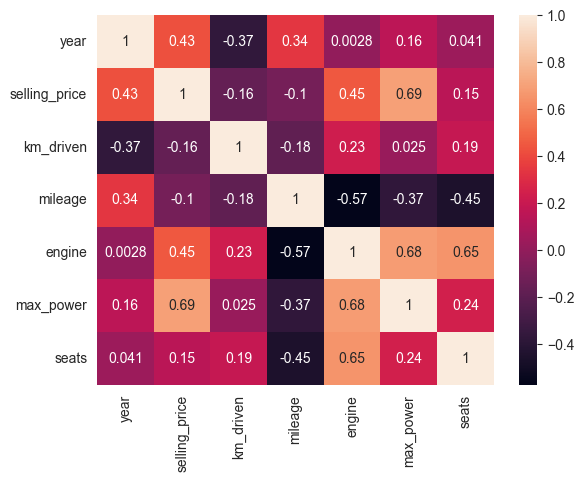

In [23]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True);

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1. Наименее скоррелированы между собой year и engine - коэффициент корреляции равен всего 0.0028. 
2. Довольно сильная положительная линейная зависимость наблюдается между selling_price и max_power (значение коэффициента корреляции - 0.69), между engine и max_power (значение коэффициента корреляции - 0.68), а также между seats и engine (значение коэффициента корреляции - 0.65) 
3. Коэффициент корреляции между годом и пробегом автомобиля равен -0.37, что, на первый взгляд, позволяет сделать предположение, что с ростом года выпуска значение пробега будет уменьшатся (т.е. чем меньше год выпуска, тем, скорее всего, больше километров машина проехала к дате продажи). Так же это, вроде бы, не противоречит здравому смыслу: чем старше автомобиль, тем больше на нем ездили. Но чтобы дать более точную оценку, нужно посмотреть на диаграмму рассеяния соответствующих признаков (см. ниже). По ней видно, что на диапазоне значений года выпуска от 1990 до ~2006 можно говорить скорее о положительной корреляции между признаками, т.к. с ростом значения года выпуска пробег к моменту продажи - увеличивался. А вот на диапазоне от 2010 до 2020 года можно говорить скорее об отрицательно корреляции признаков. Другими словами, опираясь не только на значение коэффициента корреляции, но и на картину рассеяния признаков, нельзя однозначно, без дополнительных уточнений и оговорок, утверждать, что чем меньше год, тем больше километров проехал автомобиль на момент продажи.

<Axes: xlabel='year', ylabel='km_driven'>

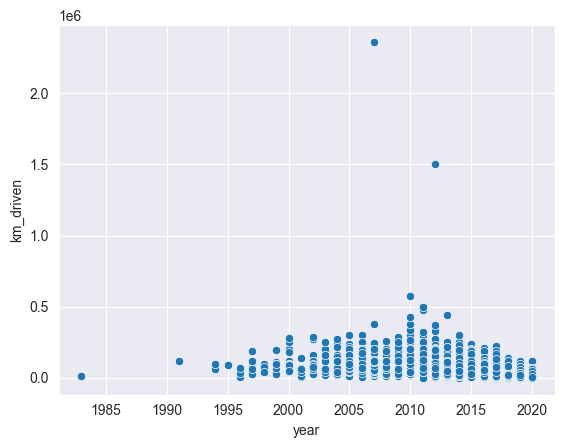

In [24]:
sns.scatterplot(data = df_train, x='year', y='km_driven')

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: xlabel='max_power', ylabel='engine'>

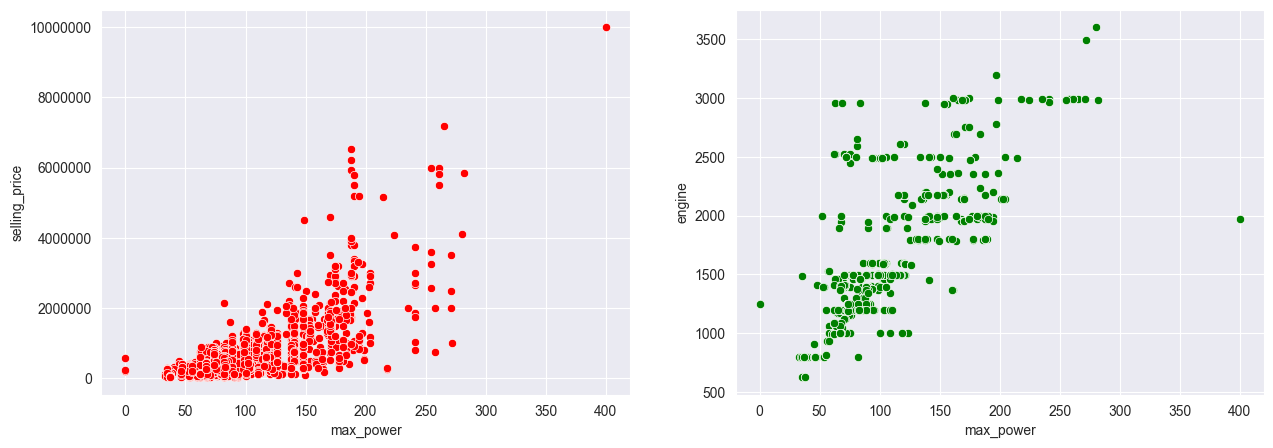

In [25]:
""" Построим две диаграммы рассеяния. Для пар признаков selling_price и max_power, 
и engine и max_power, т.к. коэффициенты корреляции для этих пар отличаются лишь на одну сотую"""
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(data = df_train, x = 'max_power', y='selling_price', color='red', ax=ax[0])
ax[0].ticklabel_format(style='plain', axis='y')

sns.scatterplot(data = df_train, x = 'max_power', y='engine', color = 'green', ax=ax[1])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

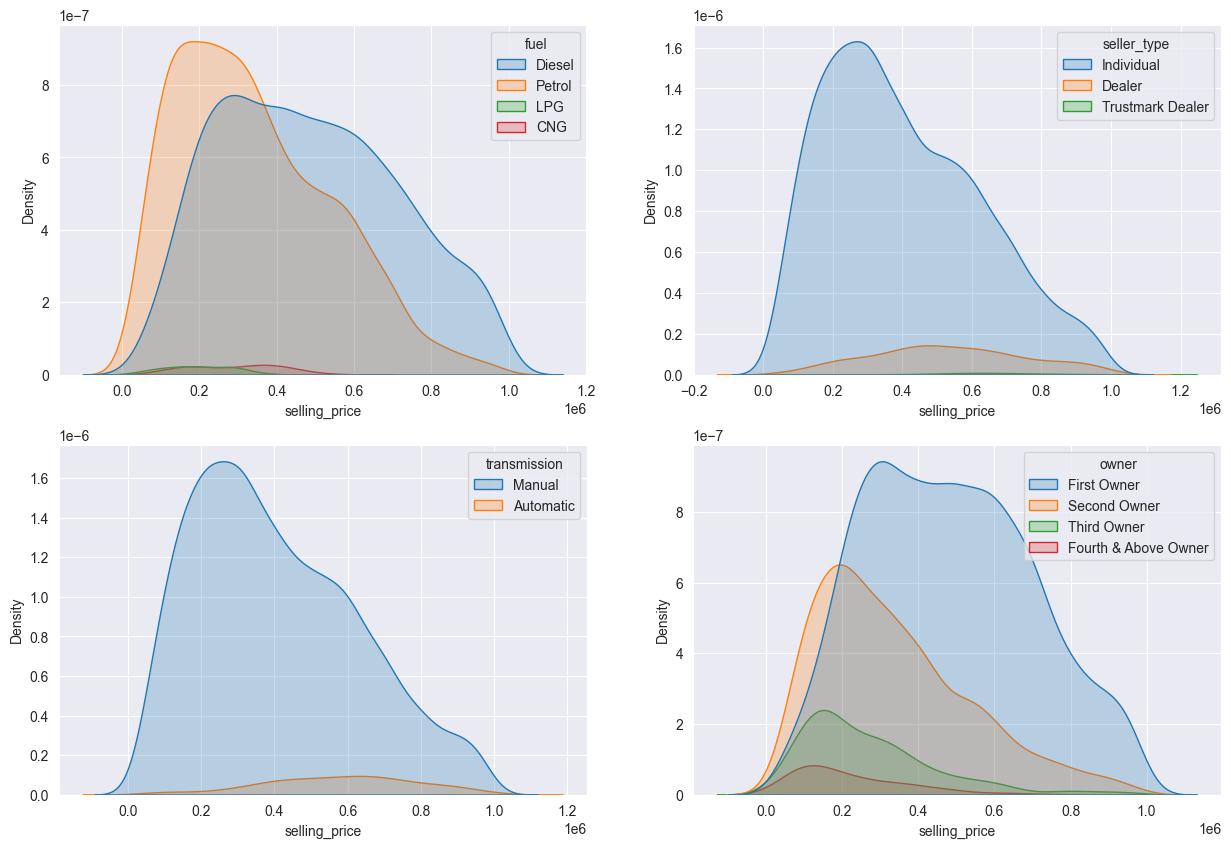

In [26]:
"""
Анализ зависимостей признаков, проведенный выше, касался числовых признаков и не включал категориальные. Посмотрим на то, 
как категориальные признаки влияют на целевую переменную, отобразив графики распределения для таргета, в зависимости от 
соответствующих значений категории. Для улучшения картины не будем учитывать объекты, у которых цена превышает значение в 1млн.,
поскольку таких объектов очень мало они не сильно влияют на картину (при необходимости их можно посмотреть отдельно)
"""
plt.figure(figsize=(15,10))
categorial = ['fuel', 'seller_type', 'transmission', 'owner']
for i in range(4): 
    plt.subplot(2,2,i+1)
    sns.kdeplot(df_train[df_train['selling_price']<1000000], x='selling_price', hue=categorial[i], fill=True)

Из графиков выше, можно видеть, что распределения цены машин для разных значений каждого категориального признака несколько отличаются. Так, например, наиболее распространенная цена для машин на бензине несколько ниже, чем цена для машин на дизельном топливе. Также можно заметить, что цена продажи у дилера в среднем выше цены при индивидуальной продаже, а цена машин с механической коробкой передач пониже цены машин с автоматом. Наконец, можно увидеть, что цена автомобиля в среднем ниже при увеличении количества владельцев (возникаете ощущение, что этот категориальный признак стоит преобразовать в числовой, значение которого будет равно количеству владельцев) 

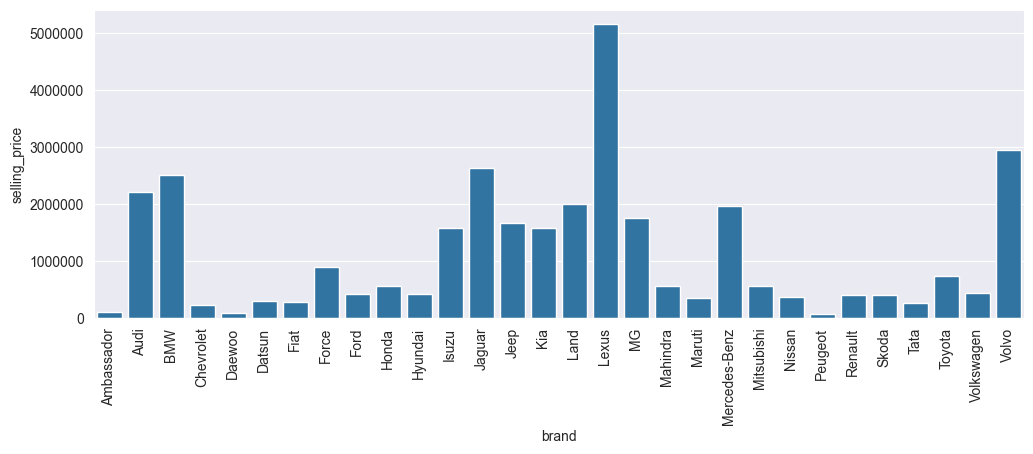

In [27]:
"""Также посмотрим на влияние марки автомобиля на цену. Очевидно, она должны быть. Для этого выделим из name 
первое слово, сделаем группировку по полученному полю и посмотрим медиану цены"""

df_train_with_parsed_name = df_train.copy()
df_train_with_parsed_name['brand'] = df_train['name'].apply(lambda x: " ".join(str(x).split()[:1]))

plt.figure(figsize=(12,4))
sns.barplot(df_train_with_parsed_name.groupby(['brand'], as_index=False).agg({'selling_price' : 'median'}), x = 'brand', y='selling_price')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Из графика видим, что марка автомобиля влияет на цену. Например, медианы цены премиальных Audi и BMW выше чем у Volkswagen или Toyota

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [28]:
y_train = df_train['selling_price']
X_train = df_train.drop(['selling_price','name','seller_type','owner','fuel','transmission'], axis=1)

In [29]:
assert X_train.shape == (5840, 6)

In [30]:
y_test = df_test['selling_price']
X_test = df_test.drop(['selling_price','name','seller_type','owner','fuel','transmission'], axis=1)

In [31]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
model = LinearRegression()
model.fit(X_train, y_train)

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

In [33]:
# чтобы не копировать следующие 6 строк далее, вынесем их в функцию
def print_metrics():
    print(f'Значение MSE')
    print(f'  трейн: {MSE(y_train, y_train_predicted):.4f}')
    print(f'  тест:  {MSE(y_test, y_test_predicted):.4f}')
    
    print(f'Значение R^2')
    print(f'  трейн: {r2_score(y_train, y_train_predicted):.10f}')
    print(f'  тест:  {r2_score(y_test, y_test_predicted):.10f}')
    
print_metrics()

Значение MSE
  трейн: 116874153930.0288
  тест:  233298779730.4571
Значение R^2
  трейн: 0.5922591702
  тест:  0.5941419795


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_train_predicted = model.predict(X_train_scaled)
y_test_predicted = model.predict(X_test_scaled)

In [35]:
print_metrics()

Значение MSE
  трейн: 116874153930.0289
  тест:  233298779730.4498
Значение R^2
  трейн: 0.5922591702
  тест:  0.5941419795


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [36]:
def display_weights(): 
    display(pd.DataFrame({'feature_name': X_train.columns, 'feature_weight': model.coef_}))

display_weights()
print('Наиболее информативным признаком является max_power, т.к. коэффициент при нем имеет наибольшее абсолютное значение \n'
      'а значит при изменении любого из признаков на 1, именно изменение max_power будет давать наибольшее изменение предсказываемого таргета')

,feature_name,feature_weight
0,year,152772.570846
1,km_driven,-44158.818520
2,mileage,28833.925778
3,engine,61178.494337
4,max_power,322807.353259
5,seats,-23209.132486


Наиболее информативным признаком является max_power, т.к. коэффициент при нем имеет наибольшее абсолютное значение 
а значит при изменении любого из признаков на 1, именно изменение max_power будет давать наибольшее изменение предсказываемого таргета


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [37]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_scaled, y_train)
y_train_predicted = model.predict(X_train_scaled)
y_test_predicted = model.predict(X_test_scaled)
# your code here

In [38]:
print_metrics()

Значение MSE
  трейн: 116874153940.1429
  тест:  233299450599.1693
Значение R^2
  трейн: 0.5922591702
  тест:  0.5941408124


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [39]:
display_weights()
print('L1-регуляризация не занулила веса. Видимо, значение коэффициента alpha по умолчанию, равное для Lasso 1, \n'
      'недостаточно велико и требуется подбор оптимального значения')

,feature_name,feature_weight
0,year,152772.390214
1,km_driven,-44157.689858
2,mileage,28832.043396
3,engine,61173.662409
4,max_power,322808.236919
5,seats,-23206.255649


L1-регуляризация не занулила веса. Видимо, значение коэффициента alpha по умолчанию, равное для Lasso 1, 
недостаточно велико и требуется подбор оптимального значения


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [40]:
from sklearn.model_selection import GridSearchCV

"""воспользуемся GridSearchCV для подбора оптимального alpha. Будем искать его в диапазоне 
от 0.1 до до 50000, используя кросс-валидацию с 10 фолдами и r2 в качестве скоринг-функции """
grid_search = GridSearchCV(Lasso(), {'alpha' : np.linspace(0.1, 50000, 1000)}, cv=10, scoring="r2")
grid_search.fit(X_train_scaled, y_train)

"""выведем значение метрики и значение параметра alpha оптимальной модели"""
print(grid_search.best_score_) 
print(grid_search.best_params_)

0.5750274726932187
{'alpha': 26626.673373373374}


In [41]:
"""возьмем лучшую модель, предскажем с ее помощью таргет на трейне и тесте, 
после чего, как обычно, выведем значений MSE и R^2"""
model = grid_search.best_estimator_
y_train_predicted = model.predict(X_train_scaled)
y_test_predicted = model.predict(X_test_scaled)
print_metrics()

Значение MSE
  трейн: 119650304199.6460
  тест:  250343833248.9093
Значение R^2
  трейн: 0.5825739680
  тест:  0.5644895669


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

Т.к. на вход было подано 1000 возможных значений alpha, а при кросс-валидации с 10 фолдами, для каждого значения alpha обучалось 10 моделей, то общее количество моделей, которое GridSearchCV обучил для подбора оптимального значения aplha, равно 10000. 

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [42]:
print('У лучшей найденной модели коэффициент регуляризации (alpha) равен: ', grid_search.best_params_['alpha'])

У лучшей найденной модели коэффициент регуляризации (alpha) равен:  26626.673373373374


In [43]:
display_weights()
print('В результате регуляризации с таким коэффициентом занулились веса при mileage, engine и seats')

,feature_name,feature_weight
0,year,145849.992382
1,km_driven,-15719.106858
2,mileage,0.000000
3,engine,0.000000
4,max_power,321805.050089
5,seats,-0.000000


В результате регуляризации с таким коэффициентом занулились веса при mileage, engine и seats


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [44]:
from sklearn.linear_model import ElasticNet

"""снова воспользуемся GridSearchCV для подбора оптимальных alpha B l1_ration в ElasticNet-регрессии
Будем искать alpha и l1_ratio в диапазонах [0.1, 50000] и [0.01, 1] соответственно. Используем кросс-валидацию 
с 10 фолдами и r2 в качестве скоринг-функции """
params = {
    'alpha' : np.linspace(0.1, 50000, 1000),
    'l1_ratio': np.linspace(0.01, 1, 10),
}
grid_search = GridSearchCV(ElasticNet(), params, cv=10, scoring="r2")
grid_search.fit(X_train_scaled, y_train)

"""выведем значение метрики и значение параметров alpha и l1_ratio оптимальной модели"""
print(grid_search.best_score_) 
print(grid_search.best_params_)

0.5761008654524449
{'alpha': 0.1, 'l1_ratio': 0.01}


In [45]:
"""возьмем лучшую модель, предскажем с ее помощью таргет на трейне и тесте, 
после чего, как обычно, выведем значений MSE и R^2"""
model = grid_search.best_estimator_
y_train_predicted = model.predict(X_train_scaled)
y_test_predicted = model.predict(X_test_scaled)
print_metrics()

Значение MSE
  трейн: 117974189104.5151
  тест:  245769559480.9534
Значение R^2
  трейн: 0.5884214590
  тест:  0.5724471983


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [46]:
print(f'У лучшей найденной модели: \n'
      f'- alpha = {grid_search.best_params_["alpha"]};\n'
      f'- l1_ratio = {grid_search.best_params_["l1_ratio"]}.')

У лучшей найденной модели: 
- alpha = 0.1;
- l1_ratio = 0.01.


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [47]:
X_train_cat = df_train.drop(['selling_price','name'], axis=1)

"""для того, чтобы вычислить значения MSE и R^2 на тесте, сделаем все преобразования также и с тестовым датасетом"""
X_test_cat = df_test.drop(['selling_price','name'], axis=1)

In [48]:
assert X_train_cat.shape == (5840, 10)

In [49]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [50]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cat_columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
"""для OneHot encoding воспользуемся OneHotEncoder, настроив его следующим образом: 
- drop = first - один из полученных столбцов для каждого признака удалялся, как сказано в условии;
- handle_unknown = ignore - в случае, если энкодеру попадутся незнакомые значения признака, то он их будет игнорировать
  (мы не знаем, какие еще значения категориальных признаков могут прийти на вход модели в проде) """
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output = False)
one_hot_encoder = one_hot_encoder.fit(X_train_cat[cat_columns])
encoded_cat_columns = one_hot_encoder.get_feature_names_out(cat_columns)

"""В трейне и тесте заменим категориальные признаки на их закодированные версии"""
X_train_cat = pd.concat(
    [
        X_train_cat.drop(cat_columns, axis=1), 
        pd.DataFrame(one_hot_encoder.transform(X_train_cat[cat_columns]), columns = encoded_cat_columns)
    ],
    axis=1
)



X_test_cat = pd.concat(
    [
        X_test_cat.drop(cat_columns, axis=1), 
        pd.DataFrame(one_hot_encoder.transform(X_test_cat[cat_columns]), columns = encoded_cat_columns)
    ],
    axis=1
)

assert X_train_cat.shape == (5840, 23)
assert X_test_cat.shape == (1000, 23)

In [51]:
"""Дополнительно перед обучением модели сделаем стандартизацию признаков скейлером"""
scaler = StandardScaler()
scaler.fit(X_train_cat)
X_train_cat_scaled = scaler.transform(X_train_cat)
X_test_cat_scaled = scaler.transform(X_test_cat)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

"""воспользуемся GridSearchCV для подбора оптимального alpha. Будем искать его в диапазоне 
от 0.1 до до 50000, используя кросс-валидацию с 10 фолдами и r2 в качестве скоринг-функции """
grid_search = GridSearchCV(Ridge(), {'alpha': np.linspace(0.1, 50000, 1000)}, cv=10, scoring="r2")
grid_search.fit(X_train_cat_scaled, y_train)

"""выведем значение метрики и значение параметра alpha оптимальной модели"""
print(grid_search.best_score_)
print(grid_search.best_params_)

0.6217878702826349
{'alpha': 650.7493493493495}


In [53]:
"""возьмем лучшую модель, предскажем с ее помощью таргет на трейне и тесте, 
после чего, как обычно, выведем значений MSE и R^2"""
model = grid_search.best_estimator_
y_train_predicted = model.predict(X_train_cat_scaled)
y_test_predicted = model.predict(X_test_cat_scaled)
print_metrics()

Значение MSE
  трейн: 96741613927.9457
  тест:  223553704682.7778
Значение R^2
  трейн: 0.6624959017
  тест:  0.6110949909


Качество предсказаний **удалось улучшить, но незначительно**. Значение R^2 стало немного ближе к 1 (ранее было порядка ~0.57, а теперь на трейне ~0.66, а на тесте ~0.61)

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Перед тем, как перейти к написанию кода наметим **план действий по работе с признаками**. 
1. Как и предложено в пункте 1 условия выше попробуем: 
    - добавить признак, характеризующий количество лошадиных сил на литр объема двигателя;
    - заменить год на квадрат года
2. Заменим категориальный признак owner на числовой, записав туда число владельцев (*в результате экспериментов от этой модификации признака отказались, т.к. ощутимого результата она не дает, но создает проблемы при подготовке признаков внутри сервиса; соответствующий код был просто закомментирован в блоках ниже)
3. Удалим из трейна объекты с выбросами численных параметров. Для этого предварительно проанализируем, что и как удалять (см. далее)
3. Также посмотрим на таргет и попробуем удалить объекты с выбросами по таргету
4. Используем наименование автомобиля, которое до настоящего момента игнорировали. Представляется, что для более точного предсказания стоимости нам не хватает одного очень важного признака: стоимости нового автомобиля соответствующей модели, приведенная в ценах на какой-то конкретный год. К сожалению найти такие данные где-то не удалось. Но частично это можно компенсировать использованием наименования. Все наименования мы брать не будем, т.к. их слишком много, но взять первые два слова из него вполне можем (там ~200 уникальных значений). Эти два слова по сути и будут характеризовать конкретную модель, но без учета дополнительных модификаций (версия, комплектация, и пр).     
5. Будем учить модель предсказывать не y, а ln(y). Соответственно, предсказания модели будем возвращать не в чистом виде, а в виде exp(y_predicted). Предложение было озвучено в чате предмета. 

Так как набор признаков и их обработка в рамках данной части задания отличается от того, что было сделано ранее, здесь нам придется повторно пройти многие из шагов, выполненных выше (таких, как очистка значений от единиц измерения и преобразование их в числа, удаление пропусков, one hot кодирование, стандартизация и обучения модели. В качестве модели будем использовать Ridge-регрессию.

In [54]:
""" 1. Загрузим исходные датасеты и удалим дубликаты в трейне"""

df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

duplicate_flags = df_train.drop('selling_price', axis=1).duplicated()
duplicates = df_train[duplicate_flags]
df_train.drop(duplicates.index, inplace=True)
df_train.reset_index(drop=True, inplace=True)

assert df_train.shape == (5840, 13)

In [55]:
""" 2. Удалим единицы измерения в нескольких столбцах mileage, engine и max_power и преобразуем их в числа . Также удалим torque """
unit_names = ['bhp', 'kmpl', 'km/kg', 'CC']
col_names = ['mileage', 'engine', 'max_power']
dataframes = [df_train, df_test]

for df in dataframes:
    for col_name in col_names: 
        df[col_name] = pd.to_numeric(df[col_name].replace("|".join(unit_names), '', regex=True).str.strip())

df_train.drop(['torque'], axis=1, inplace=True)
df_test.drop(['torque'], axis=1, inplace=True)


""" 3. Заполним пропуски значениями медианы """
imputer = SimpleImputer(strategy='median')

col_names = ['mileage', 'engine', 'max_power', 'seats']
dataframes = [df_train, df_test]
imputer.fit(df_train[col_names])

for df in dataframes: 
    df[col_names] = imputer.transform(df[col_names])
    
col_names = ['engine', 'seats']
for df in dataframes:
    for col_name in col_names:
        df[col_name] = df[col_name].astype('int64')

А теперь перейдем к feature engineering. Но предварительно проанализируем, какие выбросы мы можем удалить. Для этого построим boxplot по всем числовым признакам и таргету.

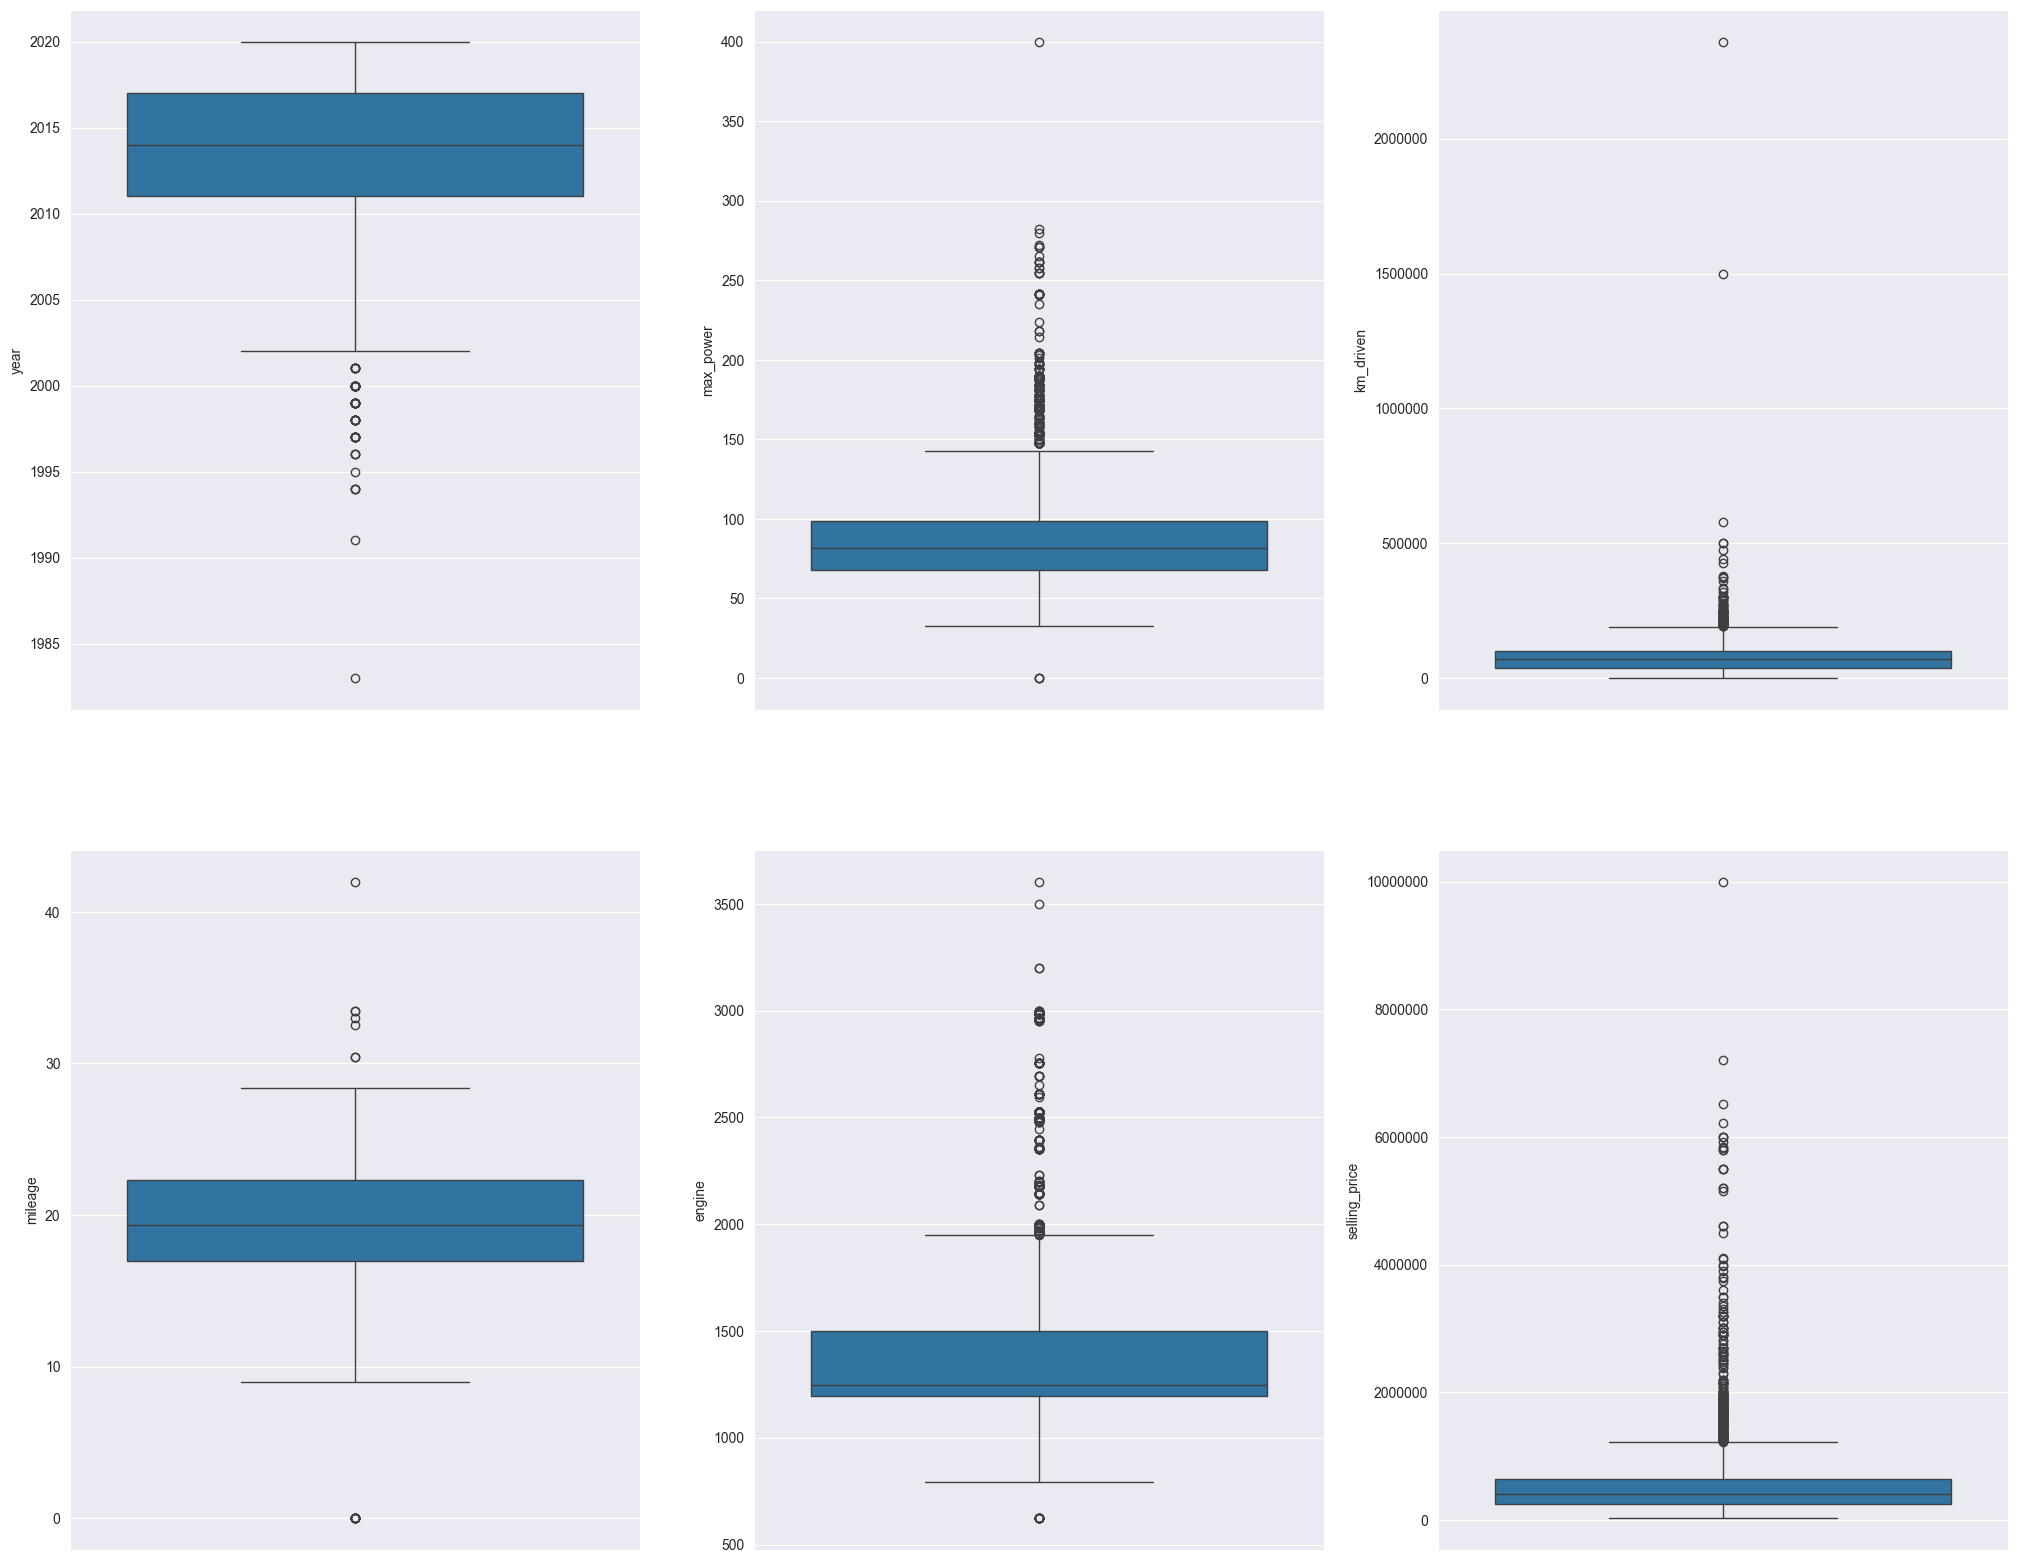

In [56]:
plt.figure(figsize=(25,20))
num_columns = ['year', 'max_power', 'km_driven', 'mileage', 'engine', 'selling_price']
for i in range(6): 
    plt.subplot(2,3,i+1)
    sns.boxplot(df_train[num_columns[i]])
    plt.ticklabel_format(style='plain', axis='y')

По графикам видно, что для каждого признака есть несколько объектов со значением, лежащим далеко от общего скопления значений. Попробуем подобрать для каждого такие пороги значений, чтоьбы количество объектов за их пределами было штучным. После этого можно будет почти без потерь их удалить. 

In [57]:
thresholds = [
    ('year', 1995, 2040),
    ('max_power', 25, 300),
    ('km_driven', 0, 500000), 
    ('mileage', 5, 35), 
    ('engine', 0 , 3500),
    ('selling_price', 0 , 8000000),
]
total = 0
for th in thresholds: 
    count = df_train[((th[1] > df_train[th[0]]) | (df_train[th[0]] > th[2]))].shape[0]
    print(f'За пределами диапазона [{th[1]},{th[2]}] параметра {th[0]} лежит {count} объектов')
    total += count 
    
print(f'Общее количество объектов-кандидатов на удаление: {total}')

За пределами диапазона [1995,2040] параметра year лежит 5 объектов
За пределами диапазона [25,300] параметра max_power лежит 4 объектов
За пределами диапазона [0,500000] параметра km_driven лежит 3 объектов
За пределами диапазона [5,35] параметра mileage лежит 15 объектов
За пределами диапазона [0,3500] параметра engine лежит 1 объектов
За пределами диапазона [0,8000000] параметра selling_price лежит 1 объектов
Общее количество объектов-кандидатов на удаление: 29


Как видим, количество найденных значений небольшое, поэтому мы можем их удалить из трейна.

In [58]:
""" 3.1 Удаляем объекты с выбросами"""
for th in thresholds: 
    ind = df_train[((th[1] > df_train[th[0]]) | (df_train[th[0]] > th[2]))].index
    df_train.drop(ind, axis=0, inplace=True)
    
df_train.reset_index(drop=True, inplace=True)
print(f'Количество строк трейна после удаления выбросов {df_train.shape[0]}')

Количество строк трейна после удаления выбросов 5813


In [59]:
""" 3.2 Изменяем существующие или добавляем новые признаки"""
dfs = [df_train, df_test]
for df in dfs: 
    # (в итоге данное изменение решил не применять) заменяем owner на целое число
    # df['owner'] = df['owner'].replace(
    #     {'Test Drive Car': 0, 'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4})
    # берем первые два слова от наименования
    df['name'] = df['name'].apply(lambda name: " ".join(str(name).split()[:2]))
    # вычисляем количество л.с. на единицу объема двигателя
    df['power_per_engine'] = df['max_power']/df['engine']
    # заменяем год на квадрат года
    df['year'] = df['year'] ** 2

In [60]:
""" 4. Разделение на X и y трейна и теста """
X_train_cat = df_train.drop(['selling_price'], axis=1)
X_test_cat = df_test.drop(['selling_price'], axis=1)
y_train = df_train['selling_price']
y_test = df_test['selling_price']


""" 5. One Hot Encoding"""
cat_columns = ['fuel', 'owner', 'seller_type', 'transmission', 'seats', 'name']
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output = False)
one_hot_encoder = one_hot_encoder.fit(X_train_cat[cat_columns])
encoded_cat_columns = one_hot_encoder.get_feature_names_out(cat_columns)

X_train_cat = pd.concat([
        X_train_cat.drop(cat_columns, axis=1), 
        pd.DataFrame(one_hot_encoder.transform(X_train_cat[cat_columns]), columns = encoded_cat_columns)],
    axis=1)

X_test_cat = pd.concat([
        X_test_cat.drop(cat_columns, axis=1), 
        pd.DataFrame(one_hot_encoder.transform(X_test_cat[cat_columns]), columns = encoded_cat_columns)],
    axis=1)


""" 6. Стандартизация признаков """
scaler = StandardScaler()
scaler.fit(X_train_cat)
X_train_cat_scaled = scaler.transform(X_train_cat)
X_test_cat_scaled = scaler.transform(X_test_cat)

""" 7. Обучение и поиск оптимальной модели"""
grid_search = GridSearchCV(Ridge(), {'alpha': np.linspace(0.1, 25000, 30)}, cv=10, scoring="r2")
"""подадим на вход для обучения на вход log(y_train)"""
grid_search.fit(X_train_cat_scaled, np.log(y_train))

print(grid_search.best_score_)
print(grid_search.best_params_)

model = grid_search.best_estimator_
"""так как обучение модели было на log(y) предсказания модели вернем как exp(y_predicted)"""
y_train_predicted = np.exp(model.predict(X_train_cat_scaled))
y_test_predicted = np.exp(model.predict(X_test_cat_scaled))

print_metrics()

C:\src\local-py\hse\ml-hw01\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.9111717853864555
{'alpha': 0.1}
Значение MSE
  трейн: 12455287570.0975
  тест:  52070416769.4881
Значение R^2
  трейн: 0.9535508039
  тест:  0.9094157445


В результате выполнения Feature Engineering получили существенное улучшение качества предсказаний. Так, на трейне R^2 - ~0.95 (было ~0.66), а на тесте - 0.91 (было ~0.61). Несмотря на то, что код выше выполняет сразу все модификации признаков, в процессе выполнения работы каждое изменение добавлялось пошагово, после чего проходило обучение модели и расчет метрик. В итоге было зафиксировано, что: 
- наибольшее улучшение в качестве предсказаний дало добавление признака name (2 первых слова из него);
- небольшое улучшение также дало логарифмирование таргета;
- остальные операции с характеристиками ощутимого эффекта не давали.

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [62]:
def business_metrics(y, y_predicted):
    diffs = abs(y - y_predicted)
    diff_thresholds  = 0.1 * y
    return (diffs <= diff_thresholds).sum() / y.shape[0]
 
res = business_metrics(y_test, y_test_predicted)
print(f'Значение бизнес-метрики на тестовом датасете: {res:.2%}') 

Значение бизнес-метрики на тестовом датасете: 47.70%


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [64]:
"""Процесс работы сервиса после получения на вход датасета с признаками объектов будет состоять из следующих шагов: 
1. Очистка полей от единиц измерения и превращение их в числовые признаки. Удаление torque
2. Заполнение пропусков
3. Генерация дополнительных признаков
4. OneHot-кодирование категориальных признаков
5. Стандартизация признаков
6. Получение предсказаний с помощью лучшей модели

Для шагов 2,4,5 и 6 сохраним обученные объекты, выполняющие их, в pickle-файл, чтобы потом использовать в сервисе
"""
import pickle
with open('models/imputer.pickle', 'wb') as f:
    pickle.dump(imputer, f)
with open('models/one_hot_encoder.pickle', 'wb') as f:
    pickle.dump(one_hot_encoder, f)
with open('models/scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)
with open('models/model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [63]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link